# 环境配置

In [1]:
import numpy as np
import scipy
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import roc_curve,auc,roc_auc_score
import matplotlib.pyplot as plt

In [2]:
# 环境配置
import os
print("当前路径 -  %s" %os.getcwd())

当前路径 -  C:\Users\纪\特征选择


In [3]:
os.chdir("G:/python文件") #改变路径

In [4]:
# 环境配置
import os
print("当前路径 -  %s" %os.getcwd())

当前路径 -  G:\python文件


# 文件处理

In [5]:
CRCtrain=pd.read_excel(r"F:/胃癌肠癌总.xlsx",sheet_name="CRC-训练集-2")#导入数据

In [6]:
CRCtrain

,姓名,疾病,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid,疾病2
0,杜燮明,CRC,0.045816,0.266039,0.934362,0.076213,0.089383,0.082997,0.018367,0.113698,0.031691,0.046410,0.075743,0.099746,0.036007,CRC
1,周金富,CRC,0.052519,0.527962,0.675994,0.127132,0.090642,0.077508,0.042011,0.418669,0.000000,0.062544,0.073977,0.206948,0.043395,CRC
2,沈爱国,CRC,0.282492,0.585535,0.653786,0.144243,0.115491,0.177909,0.036464,0.083615,0.127307,0.108046,0.074235,0.194794,0.066765,CRC
3,何建强,CRC,0.191129,0.489544,0.617701,0.209512,0.180902,0.229168,0.125878,0.211193,0.163254,0.253328,0.073525,0.229177,0.062617,CRC
4,杨惠国,CRC,0.094765,0.831703,0.112875,0.128082,0.043070,0.149125,0.167347,0.221678,0.108659,0.322949,0.011977,0.210396,0.091608,CRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,黄继国-1,P,0.006407,0.033506,0.965236,0.005314,0.035722,0.003692,0.008491,0.011030,0.036651,0.252863,0.010052,0.009263,0.013181,contral
105,周俊-1,P,0.024519,0.307127,0.900618,0.059720,0.143581,0.041089,0.073080,0.126210,0.030065,0.181767,0.060547,0.065721,0.069939,contral
106,盛竞晔-1,P,0.082368,0.469130,0.705054,0.034672,0.147502,0.129106,0.259639,0.360799,0.077226,0.116247,0.117031,0.047753,0.057983,contral
107,谢寿明,P,0.066007,0.191968,0.928057,0.035350,0.098004,0.030040,0.015551,0.241430,0.005655,0.034568,0.129907,0.091811,0.026118,contral


In [7]:
CRCtrain=CRCtrain.drop(["姓名","疾病"],axis=1) #将第一列Unnamed: 0删除
CRCtrain

,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid,疾病2
0,0.045816,0.266039,0.934362,0.076213,0.089383,0.082997,0.018367,0.113698,0.031691,0.046410,0.075743,0.099746,0.036007,CRC
1,0.052519,0.527962,0.675994,0.127132,0.090642,0.077508,0.042011,0.418669,0.000000,0.062544,0.073977,0.206948,0.043395,CRC
2,0.282492,0.585535,0.653786,0.144243,0.115491,0.177909,0.036464,0.083615,0.127307,0.108046,0.074235,0.194794,0.066765,CRC
3,0.191129,0.489544,0.617701,0.209512,0.180902,0.229168,0.125878,0.211193,0.163254,0.253328,0.073525,0.229177,0.062617,CRC
4,0.094765,0.831703,0.112875,0.128082,0.043070,0.149125,0.167347,0.221678,0.108659,0.322949,0.011977,0.210396,0.091608,CRC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.006407,0.033506,0.965236,0.005314,0.035722,0.003692,0.008491,0.011030,0.036651,0.252863,0.010052,0.009263,0.013181,contral
105,0.024519,0.307127,0.900618,0.059720,0.143581,0.041089,0.073080,0.126210,0.030065,0.181767,0.060547,0.065721,0.069939,contral
106,0.082368,0.469130,0.705054,0.034672,0.147502,0.129106,0.259639,0.360799,0.077226,0.116247,0.117031,0.047753,0.057983,contral
107,0.066007,0.191968,0.928057,0.035350,0.098004,0.030040,0.015551,0.241430,0.005655,0.034568,0.129907,0.091811,0.026118,contral


In [8]:
CRCtrain['疾病2'].unique()

array(['CRC', 'contral'], dtype=object)

# XGBoost 分类

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文
plt.rcParams['axes.unicode_minus'] = False

## 分类编码处理

In [10]:
#codes 方法返回每个分类的整数编码。
#这些编码是从 0 开始分配的，表示每个不同的分类。
#例如，如果 '对照' 列包含三个不同的分类：'A', 'B', 'C'，则 'A' 的编码为 0，'B' 的编码为 1，'C' 的编码为 2。

CRCtrain['疾病2'] = pd.Categorical(CRCtrain['疾病2']).codes 
#将 '对照' 列转换为整数编码，并将结果存储回 '对照' 列。CRC2['类别'] = pd.Categorical(IBD_2['类别']).codes

In [11]:
CRCtrain.columns

Index(['Acetoin', 'Methacrolein', 'propanoic acid', 'Hexanal', 'butyric acid',
       'Nonanal', 'Benzaldehyde', 'Pentanone', 'one', 'Geranyl acetone',
       'Isobutyric acid', 'Valeric Acid', 'Hexanoic acid', '疾病2'],
      dtype='object')

In [12]:
CRCtrain

,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid,疾病2
0,0.045816,0.266039,0.934362,0.076213,0.089383,0.082997,0.018367,0.113698,0.031691,0.046410,0.075743,0.099746,0.036007,0
1,0.052519,0.527962,0.675994,0.127132,0.090642,0.077508,0.042011,0.418669,0.000000,0.062544,0.073977,0.206948,0.043395,0
2,0.282492,0.585535,0.653786,0.144243,0.115491,0.177909,0.036464,0.083615,0.127307,0.108046,0.074235,0.194794,0.066765,0
3,0.191129,0.489544,0.617701,0.209512,0.180902,0.229168,0.125878,0.211193,0.163254,0.253328,0.073525,0.229177,0.062617,0
4,0.094765,0.831703,0.112875,0.128082,0.043070,0.149125,0.167347,0.221678,0.108659,0.322949,0.011977,0.210396,0.091608,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.006407,0.033506,0.965236,0.005314,0.035722,0.003692,0.008491,0.011030,0.036651,0.252863,0.010052,0.009263,0.013181,1
105,0.024519,0.307127,0.900618,0.059720,0.143581,0.041089,0.073080,0.126210,0.030065,0.181767,0.060547,0.065721,0.069939,1
106,0.082368,0.469130,0.705054,0.034672,0.147502,0.129106,0.259639,0.360799,0.077226,0.116247,0.117031,0.047753,0.057983,1
107,0.066007,0.191968,0.928057,0.035350,0.098004,0.030040,0.015551,0.241430,0.005655,0.034568,0.129907,0.091811,0.026118,1


In [13]:
#提取特征列
CRCtrainX=CRCtrain.iloc[:,0:13] ##定义x
#提取标签列 
CRCtrainY=CRCtrain.iloc[:,13]##定义标签

In [14]:
CRCtrainX

,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid
0,0.045816,0.266039,0.934362,0.076213,0.089383,0.082997,0.018367,0.113698,0.031691,0.046410,0.075743,0.099746,0.036007
1,0.052519,0.527962,0.675994,0.127132,0.090642,0.077508,0.042011,0.418669,0.000000,0.062544,0.073977,0.206948,0.043395
2,0.282492,0.585535,0.653786,0.144243,0.115491,0.177909,0.036464,0.083615,0.127307,0.108046,0.074235,0.194794,0.066765
3,0.191129,0.489544,0.617701,0.209512,0.180902,0.229168,0.125878,0.211193,0.163254,0.253328,0.073525,0.229177,0.062617
4,0.094765,0.831703,0.112875,0.128082,0.043070,0.149125,0.167347,0.221678,0.108659,0.322949,0.011977,0.210396,0.091608
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.006407,0.033506,0.965236,0.005314,0.035722,0.003692,0.008491,0.011030,0.036651,0.252863,0.010052,0.009263,0.013181
105,0.024519,0.307127,0.900618,0.059720,0.143581,0.041089,0.073080,0.126210,0.030065,0.181767,0.060547,0.065721,0.069939
106,0.082368,0.469130,0.705054,0.034672,0.147502,0.129106,0.259639,0.360799,0.077226,0.116247,0.117031,0.047753,0.057983
107,0.066007,0.191968,0.928057,0.035350,0.098004,0.030040,0.015551,0.241430,0.005655,0.034568,0.129907,0.091811,0.026118


In [15]:
CRCtrainY

0      0
1      0
2      0
3      0
4      0
      ..
104    1
105    1
106    1
107    1
108    1
Name: 疾病2, Length: 109, dtype: int8

# 测试集数据

In [16]:
CRCtest=pd.read_excel(r"F:/胃癌肠癌总.xlsx",sheet_name="CRC-验证集-2")#导入数据

In [17]:
CRCtest

,姓名,疾病,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid,疾病2
0,李志刚-1,P,0.118817,0.248658,0.868325,0.037440,0.095394,0.101373,0.111656,0.081420,0.078983,0.336209,0.153968,0.042993,0.082035,HC
1,李清-1,P,0.031808,0.082646,0.960246,0.004285,0.149333,0.018850,0.028223,0.029289,0.309801,0.013798,0.210158,0.013853,0.018754,HC
2,毛逸华-1,P,0.051183,0.250416,0.868651,0.043617,0.126585,0.057381,0.140007,0.104328,0.080452,0.271629,0.153968,0.060082,0.144365,HC
3,方振国-1,P,0.039940,0.119557,0.938923,0.020005,0.123123,0.048174,0.053626,0.100559,0.014198,0.258800,0.122050,0.028973,0.082035,HC
4,施俊梅,P,0.045718,0.145482,0.928406,0.062166,0.123123,0.028250,0.084702,0.128024,0.098761,0.233367,0.122050,0.031265,0.059770,HC
5,许峰,P,0.025384,0.149037,0.877189,0.019168,0.133589,0.041326,0.070835,0.146021,0.043425,0.329065,0.194105,0.048015,0.106162,HC
6,许道珍,P,0.010634,0.075771,0.944791,0.008132,0.124667,0.016729,0.022490,0.036022,0.017404,0.174939,0.227426,0.017083,0.030057,HC
7,孔祥凤,P,0.043150,0.094080,0.933092,0.002804,0.067553,0.013081,0.125623,0.106283,0.081631,0.137167,0.242172,0.023889,0.045938,HC
8,田亦武,P,0.023055,0.278656,0.634178,0.091877,0.267030,0.034721,0.176489,0.212131,0.437350,0.322132,0.131375,0.120351,0.189079,HC
9,丁宜-1,P,0.097829,0.283631,0.449241,0.074721,0.097444,0.189503,0.252641,0.180273,0.170606,0.378208,0.096541,0.075025,0.112364,HC


In [18]:
CRCtest=CRCtest.drop(["姓名","疾病"],axis=1) #将第一列Unnamed: 0删除
CRCtest

,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid,疾病2
0,0.118817,0.248658,0.868325,0.037440,0.095394,0.101373,0.111656,0.081420,0.078983,0.336209,0.153968,0.042993,0.082035,HC
1,0.031808,0.082646,0.960246,0.004285,0.149333,0.018850,0.028223,0.029289,0.309801,0.013798,0.210158,0.013853,0.018754,HC
2,0.051183,0.250416,0.868651,0.043617,0.126585,0.057381,0.140007,0.104328,0.080452,0.271629,0.153968,0.060082,0.144365,HC
3,0.039940,0.119557,0.938923,0.020005,0.123123,0.048174,0.053626,0.100559,0.014198,0.258800,0.122050,0.028973,0.082035,HC
4,0.045718,0.145482,0.928406,0.062166,0.123123,0.028250,0.084702,0.128024,0.098761,0.233367,0.122050,0.031265,0.059770,HC
5,0.025384,0.149037,0.877189,0.019168,0.133589,0.041326,0.070835,0.146021,0.043425,0.329065,0.194105,0.048015,0.106162,HC
6,0.010634,0.075771,0.944791,0.008132,0.124667,0.016729,0.022490,0.036022,0.017404,0.174939,0.227426,0.017083,0.030057,HC
7,0.043150,0.094080,0.933092,0.002804,0.067553,0.013081,0.125623,0.106283,0.081631,0.137167,0.242172,0.023889,0.045938,HC
8,0.023055,0.278656,0.634178,0.091877,0.267030,0.034721,0.176489,0.212131,0.437350,0.322132,0.131375,0.120351,0.189079,HC
9,0.097829,0.283631,0.449241,0.074721,0.097444,0.189503,0.252641,0.180273,0.170606,0.378208,0.096541,0.075025,0.112364,HC


In [19]:
#codes 方法返回每个分类的整数编码。
#这些编码是从 0 开始分配的，表示每个不同的分类。
#例如，如果 '对照' 列包含三个不同的分类：'A', 'B', 'C'，则 'A' 的编码为 0，'B' 的编码为 1，'C' 的编码为 2。

CRCtest['疾病2'] = pd.Categorical(CRCtest['疾病2']).codes 
#将 '对照' 列转换为整数编码，并将结果存储回 '对照' 列。CRC2['类别'] = pd.Categorical(IBD_2['类别']).codes

In [20]:
#提取特征列
CRCtestX=CRCtest.iloc[:,0:13] ##定义x
#提取标签列
CRCtestY=CRCtest.iloc[:,13]##定义标签

In [21]:
CRCtestX

,Acetoin,Methacrolein,propanoic acid,Hexanal,butyric acid,Nonanal,Benzaldehyde,Pentanone,one,Geranyl acetone,Isobutyric acid,Valeric Acid,Hexanoic acid
0,0.118817,0.248658,0.868325,0.037440,0.095394,0.101373,0.111656,0.081420,0.078983,0.336209,0.153968,0.042993,0.082035
1,0.031808,0.082646,0.960246,0.004285,0.149333,0.018850,0.028223,0.029289,0.309801,0.013798,0.210158,0.013853,0.018754
2,0.051183,0.250416,0.868651,0.043617,0.126585,0.057381,0.140007,0.104328,0.080452,0.271629,0.153968,0.060082,0.144365
3,0.039940,0.119557,0.938923,0.020005,0.123123,0.048174,0.053626,0.100559,0.014198,0.258800,0.122050,0.028973,0.082035
4,0.045718,0.145482,0.928406,0.062166,0.123123,0.028250,0.084702,0.128024,0.098761,0.233367,0.122050,0.031265,0.059770
5,0.025384,0.149037,0.877189,0.019168,0.133589,0.041326,0.070835,0.146021,0.043425,0.329065,0.194105,0.048015,0.106162
6,0.010634,0.075771,0.944791,0.008132,0.124667,0.016729,0.022490,0.036022,0.017404,0.174939,0.227426,0.017083,0.030057
7,0.043150,0.094080,0.933092,0.002804,0.067553,0.013081,0.125623,0.106283,0.081631,0.137167,0.242172,0.023889,0.045938
8,0.023055,0.278656,0.634178,0.091877,0.267030,0.034721,0.176489,0.212131,0.437350,0.322132,0.131375,0.120351,0.189079
9,0.097829,0.283631,0.449241,0.074721,0.097444,0.189503,0.252641,0.180273,0.170606,0.378208,0.096541,0.075025,0.112364


In [22]:
#!pip install xgboost 

In [23]:
import xgboost as xgb

In [24]:
xgb.__version__

'1.7.6'

## XGBClassifier (未调参)

In [25]:
from xgboost import XGBClassifier

In [26]:
#模型训练
clfXGB=XGBClassifier(random_state=200)

#分训练集和测试集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(CRCtrainX,CRCtrainY,test_size=0.2,random_state=100)

#在使用 ShuffleSplit 进行交叉验证时，通常需要指定 test_size 或 train_size，其中至少一个必须是非空的。

#例如，如果指定 test_size=0.3，则将数据集划分为 70% 的训练集和 30% 的测试集。

#每次迭代时，ShuffleSplit 都会重新随机重排数据集，并将其划分为训练集和测试集。

#最后，可以通过计算多个迭代的平均性能，来评估模型的泛化能力和稳定性。

StratifiedShuffleSplit 是一种交叉验证策略，用于将数据集划分为训练集和测试集。与 ShuffleSplit 类似，StratifiedShuffleSplit 也是通过对数据集进行随机重排，然后将数据集划分为多个训练集和测试集，以测试模型在不同的训练集和测试集上的性能。不同之处在于 StratifiedShuffleSplit 会保证每个划分中，训练集和测试集中的类别分布是一致的，从而避免了因类别分布不均衡而导致的模型偏差或方差问题。


sklearn.metrics.SCORERS.keys()返回一个包含所有可用的scoring函数名称的列表。这些名称可以作为scoring参数传递给cross_val_score()和GridSearchCV()等函数

In [33]:
from sklearn.metrics import SCORERS

print(SCORERS.keys())


dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

'accuracy'：准确率；

'balanced_accuracy'：平衡准确率；

'top_k_accuracy'：top_k准确率，k可以通过参数进行设置；

'average_precision'：平均准确率；

'neg_brier_score'：负Brier分数；

'f1'：F1分数，综合考虑了精确率和召回率；

'f1_micro'：微平均F1分数；

'f1_macro'：宏平均F1分数；

'f1_weighted'：加权平均F1分数，按照样本数量加权；

'f1_samples'：样本平均F1分数，针对多标签分类；

'neg_log_loss'：负对数似然损失，适用于概率模型；

'precision'：精确率；

'recall'：召回率；

'roc_auc'：ROC曲线下的面积；

'roc_auc_ovo'：多类别ROC曲线下的面积（一对多）；

'roc_auc_ovr'：多类别ROC曲线下的面积（一对剩余）；

'balanced_accuracy'：平衡准确率。

需要注意的是，有些指标是多类别分类特有的，例如roc_auc_ovo和roc_auc_ovr，可以处理多类别分类的问题。





In [34]:
clfXGB.fit(CRCtrainX,CRCtrainY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=200, ...)

In [35]:
# 预测概率
CRCtrainY_prob = clfXGB.predict_proba(CRCtrainX)[:, 1]

In [36]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

准确率=0.7151515151515151


In [37]:
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

recall=0.8


In [38]:
#balanced accuracy
print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='balanced_accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

准确率=0.7066666666666667


In [39]:
print('roc_auc={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

roc_auc=0.7792592592592593


In [40]:
print('precision{}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

precision0.7193035949557689


In [41]:

print('F1值率{}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='f1_weighted',cv=cvSFS).mean()))

F1值率0.7097026455691411


## 调参

In [42]:
import hyperopt
from hyperopt import hp,fmin,tpe,Trials,partial,STATUS_OK
from hyperopt.early_stop import no_progress_loss
from hyperopt.pyll.base import scope

In [69]:
def hyperopt_objective(params):
    clf=XGBClassifier(n_estimators= int(params['n_estimators']),#以字典的结构传入，int：参数取值为整数
                      learning_rate=int(params['learning_rate']),
                      max_depth=int(params['max_depth']),                   
                      random_state=100)#不需要调的就直接输入固定值  
     
    
    cv=StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)#定义交叉验证
    
    res = cross_val_score(clf,                                        
                          CRCtrainX,CRCtrainY, #输入交叉验证训练样本 
                          scoring='roc_auc',
                          cv=cv,
                          #error_score="raise",
                          ).mean() #如果交叉验证中算法执行报错，告诉错误理由
    
  
    return res 
 

In [70]:
spaces = {"n_estimators": hp.quniform("n_estimators",25,500,25),#均匀分布的浮点数
          "max_depth": hp.quniform("max_depth", 1, 10,2),
          "learning_rate": hp.quniform("learning_rate",0.1,1,0.1)}
         
                                        

In [71]:

    #保存送代过程
    trials=Trials()
    
    #设置提前停止
    early_stop_fn=no_progress_loss(100)  #连续100次损失函数没有下降，就停止模型
    
    #定义代理模型
    params_best2=fmin(hyperopt_objective,
                     space=spaces,
                     algo=tpe.suggest,
                     max_evals=100,
                     verbose=True,
                     trials=trials,
                     early_stop_fn=early_stop_fn,
                     rstate=np.random.default_rng(100)#稳定优化参数结果
                 )     
#报错代码段：rstate=RandomState(seed),解决方案：rstate=np.random.default_rng(seed),问题根源：版本问题
                      

    
    

100%|█████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.16trial/s, best loss: 0.5]


In [73]:
params_best2


{'learning_rate': 0.6000000000000001, 'max_depth': 4.0, 'n_estimators': 450.0}

In [95]:
clfXGB=XGBClassifier(learning_rate=0.6, max_depth=4, n_estimators=450, random_state=200)

In [96]:
clfXGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=450, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=200, ...)

In [97]:
print('准确率={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器


准确率=0.6909090909090908


In [98]:
print('roc_auc={}'.format(cross_val_score(clfXGB,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

roc_auc=0.74


## shap

In [90]:
import shap

In [116]:
Y = CRC['疾病']

In [251]:
Y

NameError: name 'Y' is not defined

In [121]:
#训练模型
XGBmodel=clfXGB
XGBmodel.fit(CRCX,CRCY)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=450, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=200, ...)

In [122]:
explainer = shap.Explainer(XGBmodel)
shap_values = explainer(CRCX)


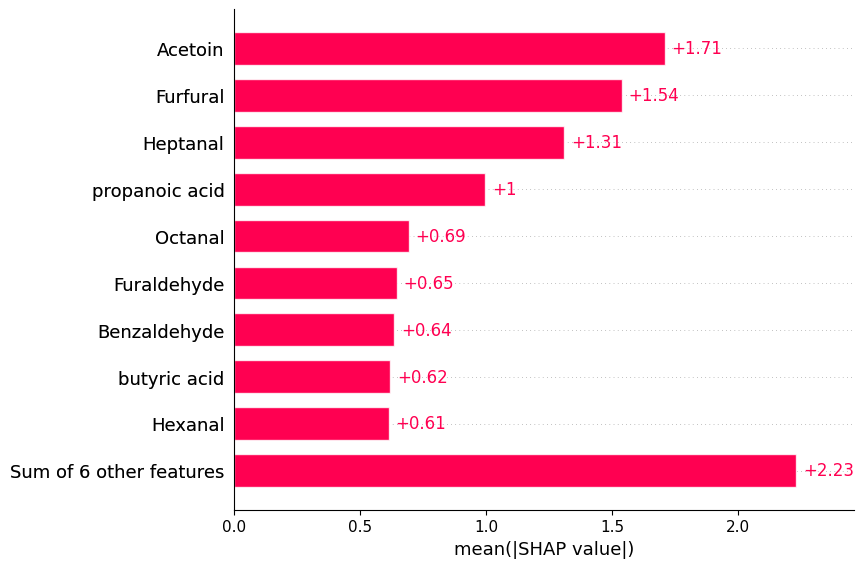

In [123]:
shap.plots.bar(shap_values, max_display=10)

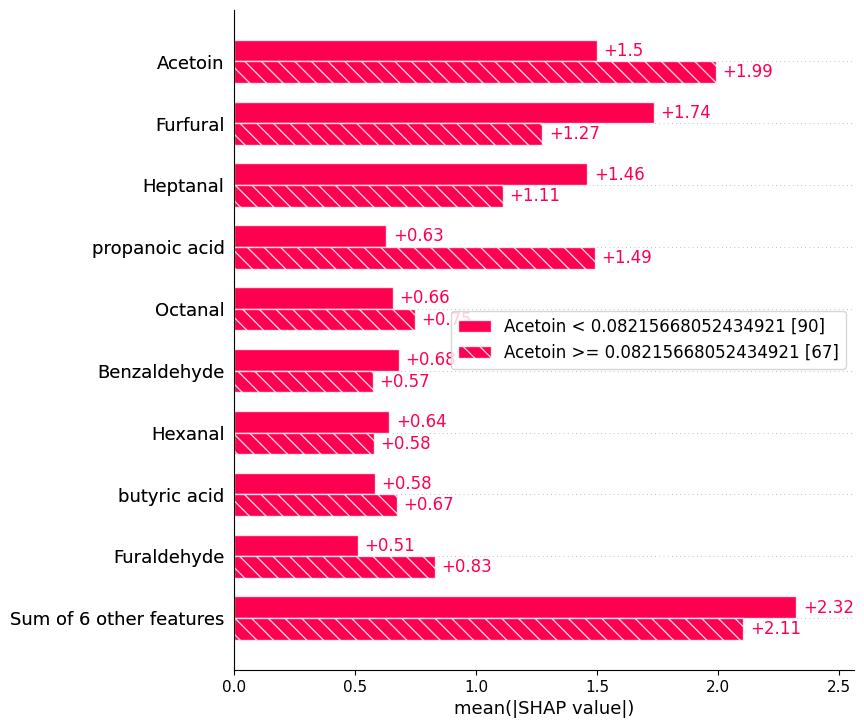

In [124]:
shap.plots.bar(shap_values.cohorts(2).abs.mean(0))


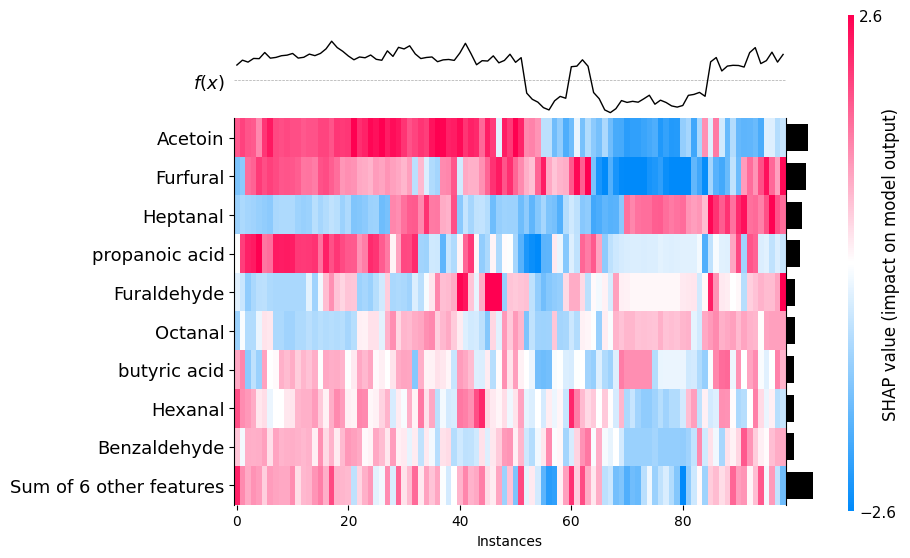

In [125]:
shap.plots.heatmap(shap_values[1:100])

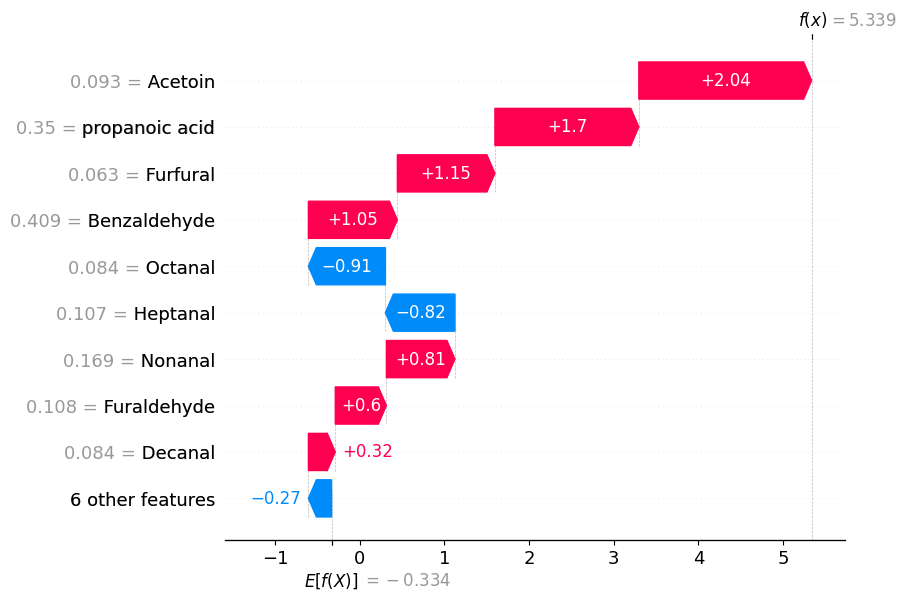

In [136]:
shap.plots.waterfall(shap_values[11]) # For the first observation


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


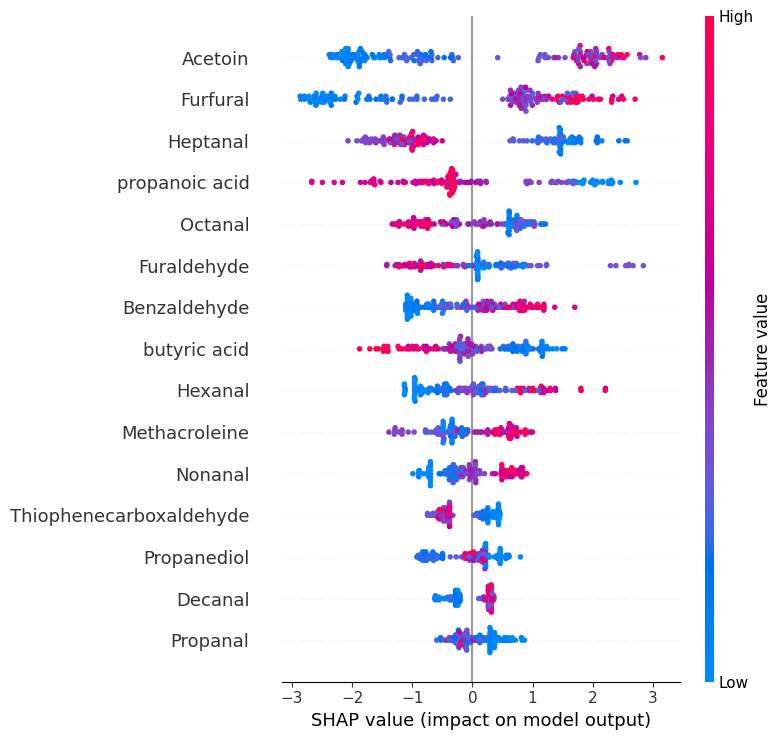

In [129]:
shap.summary_plot(shap_values, CRCX)

# SVM

In [25]:
from sklearn import svm

# 创建SVM分类器对象
svmclf = svm.SVC()

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

cvSFS= StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=100)

In [27]:
print('roc_auc={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

roc_auc=0.802962962962963


In [28]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

准确率=0.7454545454545454


In [29]:
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

recall=0.8333333333333333


In [30]:
print('precision{}'.format(cross_val_score(svmclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

precision0.7378260869565217


In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# 使用训练集进行模型训练
svmclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = svmclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


AUC: 0.82
Accuracy: 0.84
Precision: 0.84
Recall: 0.90


In [34]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = svmclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")


95% Confidence Interval for AUC: [0.71626984 0.91133005]


In [52]:
import matplotlib.pyplot as plt

# 设置字体为Arial
plt.rcParams["font.family"] = "Arial"
plt.figure(figsize=(6, 8), dpi=300)  # 这里的参数表示宽度和高度都为6英寸，输出分辨率为300 DPI


<Figure size 1800x2400 with 0 Axes>

<Figure size 1800x2400 with 0 Axes>

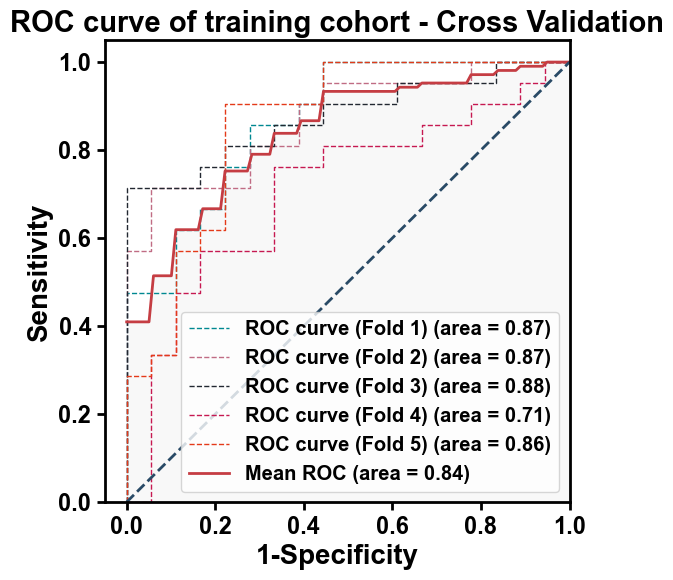

In [54]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit

# 创建 StratifiedShuffleSplit 对象
cvSFS = StratifiedShuffleSplit(n_splits=5, test_size=0.35, random_state=100)

# 初始化空列表，用于存储每个折叠的ROC曲线数据
roc_data = []

# 设置图像大小
plt.figure(figsize=(6, 6))  # 设置宽度为8英寸，高度为6英寸

# 循环遍历每个折叠
for train_index, test_index in cvSFS.split(CRCtrainX, CRCtrainY):
    X_train, X_test = CRCtrainX.iloc[train_index], CRCtrainX.iloc[test_index]
    y_train, y_test = CRCtrainY.iloc[train_index], CRCtrainY.iloc[test_index]

    # 训练SVM模型
    svmclf.fit(X_train, y_train)

    # 获取决策函数值
    decision_values = svmclf.decision_function(X_test)

    # 计算 ROC 曲线的各个点
    fpr, tpr, thresholds = roc_curve(y_test, decision_values)
    roc_auc = auc(fpr, tpr)

    # 将ROC曲线数据添加到列表中
    roc_data.append((fpr, tpr, roc_auc))

# 创建一个颜色列表，可以根据需要添加更多颜色
colors = ['#008891', '#c06c84', '#222831', '#c61951', '#e43a19']

# 绘制每个折叠的ROC曲线
for i, (fpr, tpr, roc_auc) in enumerate(roc_data):
    color = colors[i % len(colors)]  # 通过取余来循环使用颜色列表
    plt.plot(fpr, tpr, lw=1, linestyle='--', color=color, label='ROC curve (Fold %d) (area = %0.2f)' % (i + 1, roc_auc))

# 绘制平均ROC曲线
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr, _ in roc_data], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

# 添加阴影
plt.fill_between(mean_fpr, 0, mean_tpr, alpha=0.2, color='#dcdddd')

# 绘制平均ROC曲线
plt.plot(mean_fpr, mean_tpr, color='#c53d43', lw=2, linestyle='-', label='Mean ROC (area = %0.2f)' % mean_auc)

plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.plot([0, 1], [0, 1], color='#294a66', lw=2, linestyle='--')
# 设置轴线宽度
ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
# 设置轴线刻度线的宽度和长度
ax.tick_params(axis='x', which='both', width=2, length=6)
ax.tick_params(axis='y', which='both', width=2, length=6)

# 设置轴线标签和标题的字体和粗细
plt.ylabel('Sensitivity', fontsize=20, fontweight='bold')
plt.xlabel('1-Specificity', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')
plt.title('ROC curve of training cohort - Cross Validation', fontsize=21, fontweight='bold')

from matplotlib.font_manager import FontProperties
# 创建 FontProperties 对象并设置字体为加粗
font = FontProperties()
font.set_weight('bold')
font.set_size(14.5)  # 设置字体大小
# 设置图例并传递 FontProperties 对象
plt.legend(prop=font, loc="lower right")


# 保存图像并设置输出分辨率
plt.savefig("SVM.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

plt.show()




In [45]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred)
auc_value = auc(fpr, tpr)
print("AUC:", auc_value)


AUC: 0.7833333333333333


In [38]:
from sklearn.metrics import roc_curve, auc

# 获取模型在测试集上的预测概率
y_pred_prob = svmclf.decision_function(CRCtestX)  # 使用decision_function获取概率

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred_prob)

# 计算AUC
roc_auc = auc(fpr, tpr)

In [36]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# 使用模型进行测试集预测
y_pred = svmclf.predict(CRCtestX)

# 计算AUC
y_pred_prob = svmclf.decision_function(CRCtestX)
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 计算准确性
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算混淆矩阵
confusion = confusion_matrix(CRCtestY, y_pred)
# 计算特异性
specificity = confusion[0, 0] / (confusion[0, 0] + confusion[0, 1])

# 计算敏感性
sensitivity = confusion[1, 1] / (confusion[1, 0] + confusion[1, 1])

print(f"AUC: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")


AUC: 0.93
Accuracy: 0.84
Specificity: 0.75
Sensitivity: 0.90


In [37]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = svmclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")


95% Confidence Interval for AUC: [0.72743056 0.9194847 ]


In [53]:
y_pred_prob

array([ 0.20653186,  1.45250144,  0.34404339,  0.79431854,  0.78127954,
        0.80858793,  1.2238719 ,  1.02111689,  1.16795343, -0.00304681,
        0.2393693 ,  0.78888928,  0.25354136, -0.43716476, -0.58790907,
       -0.1997157 , -0.02886528,  0.71501954,  0.90603489,  1.10684973,
        0.51147701,  0.90051884,  1.30232201, -0.14617023,  0.2415486 ,
        0.34018863, -0.06100811,  0.94966213,  1.22397764,  1.3403954 ,
       -0.4481355 , -0.82772513,  0.22258204, -0.29327753, -0.17633146,
        0.94421577, -0.25093543, -0.97964081, -0.71095708, -0.41890724,
       -0.51277234, -0.29476447, -0.75937071,  0.35079591,  0.2340005 ,
       -0.28953488, -0.54013376, -0.77937583, -0.77057673, -0.18471393])

In [61]:
roc_auc

0.885

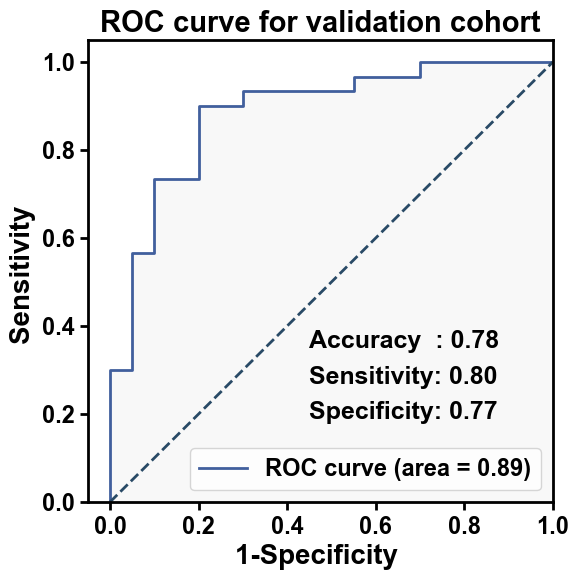

In [55]:
from sklearn.metrics import roc_curve, auc

# 获取模型在测试集上的预测概率
y_pred_prob = svmclf.decision_function(CRCtestX)  # 使用decision_function获取概率

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(CRCtestY, y_pred_prob)

# 计算AUC
roc_auc = auc(fpr, tpr)

# 设置图像大小
plt.figure(figsize=(6, 6))
# 绘制ROC曲线
plt.plot(fpr, tpr, color='#415f9d', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='#294a66', lw=2, linestyle='--')

# 添加阴影
plt.fill_between(fpr, tpr, 0, alpha=0.2, color='#dcdddd')  # 添加阴影
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])

ax = plt.gca()
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
# 设置轴线刻度线的宽度和长度
ax.tick_params(axis='x', which='both', width=2, length=6)
ax.tick_params(axis='y', which='both', width=2, length=6)


plt.title('ROC curve for validation cohort', fontsize=21, fontweight='bold')
# 设置轴线标签和标题的字体和粗细从
plt.ylabel('Sensitivity ', fontsize=20, fontweight='bold')
plt.xlabel('1-Specificity ', fontsize=20, fontweight='bold')
plt.xticks(fontsize=17, fontweight='bold')
plt.yticks(fontsize=17, fontweight='bold')

from matplotlib.font_manager import FontProperties
# 创建 FontProperties 对象并设置字体大小
font = FontProperties()
font.set_weight('bold')
font.set_size(17)  # 设置字体大小

# 设置图例并传递 FontProperties 对象
plt.legend(prop=font, loc="lower right")

accuracy_text = f'Accuracy  : 0.78'
sensitivity_text = f'Sensitivity: 0.80'
specificity_text = f'Specificity: 0.77'

# 添加文本标签到图例位置
plt.text(0.45, 0.35, accuracy_text, fontsize=18, fontweight='bold')
plt.text(0.45, 0.27, sensitivity_text, fontsize=18, fontweight='bold')
plt.text(0.45, 0.19, specificity_text, fontsize=18, fontweight='bold')





# 保存图像并设置输出分辨率
# 保存图像并设置输出分辨率
plt.savefig("SVM_ROC-voc.png", dpi=300, bbox_inches='tight', pad_inches=0.1)


plt.show()

In [41]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# 获取模型在测试集上的预测标签
y_pred = svmclf.predict(CRCtestX)

# 计算AUC
y_pred_prob = svmclf.predict(CRCtestX)  # 获取决策函数值作为预测概率
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


AUC: 0.825
Accuracy: 0.84
Specificity: 0.75
Sensitivity: 0.9


In [174]:
explainer = shap.KernelExplainer(svmclf.predict,CRCX)

Using 157 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [175]:
shap_values = explainer(CRCX)

  0%|          | 0/157 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


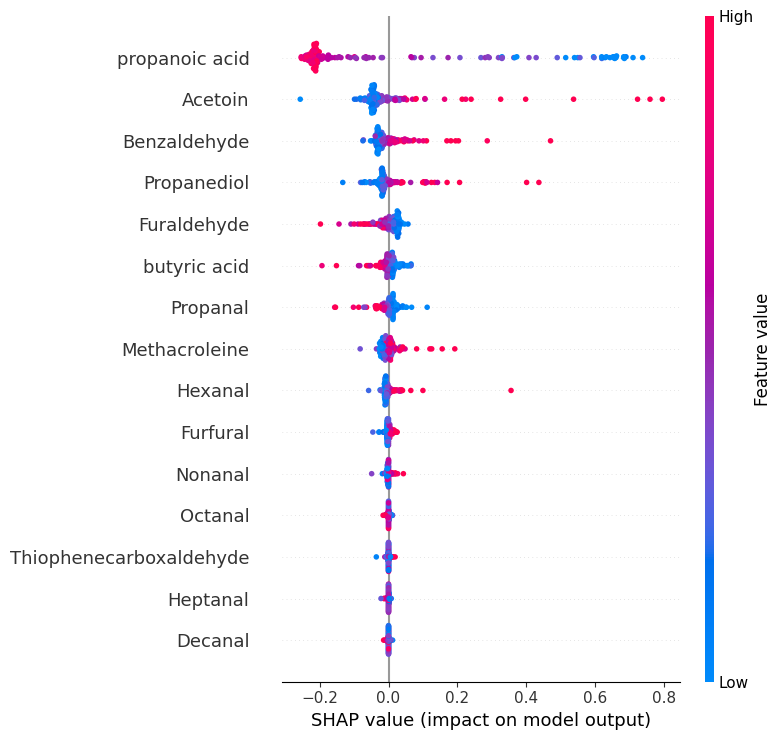

In [176]:
shap.summary_plot(shap_values, CRCX)

#  GaussianNB

In [42]:
from sklearn.naive_bayes import GaussianNB

# 创建朴素贝叶斯分类器对象
NBclf = GaussianNB(var_smoothing=1e-9)

In [43]:
print('roc_auc={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

roc_auc=0.8170370370370371


In [44]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

准确率=0.7636363636363636


In [45]:
print('precision{}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

precision0.7378618925831202


In [46]:
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(NBclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

recall=0.9


In [47]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 使用训练集进行模型训练
NBclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = NBclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


AUC: 0.67
Accuracy: 0.70
Precision: 0.71
Recall: 0.83


In [48]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
NBclf.fit(CRCtrainX, CRCtrainY)
# 获取模型在测试集上的预测概率
y_pred_prob = NBclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = NBclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


AUC: 0.7983333333333333
Accuracy: 0.7
Specificity: 0.5
Sensitivity: 0.8333333333333334


In [50]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = NBclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

95% Confidence Interval for AUC: [0.48263889 0.78429903]


In [180]:
explainer = shap.KernelExplainer(NBclf.predict,CRCX)

Using 157 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [181]:
shap_values = explainer(CRCX)

  0%|          | 0/157 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


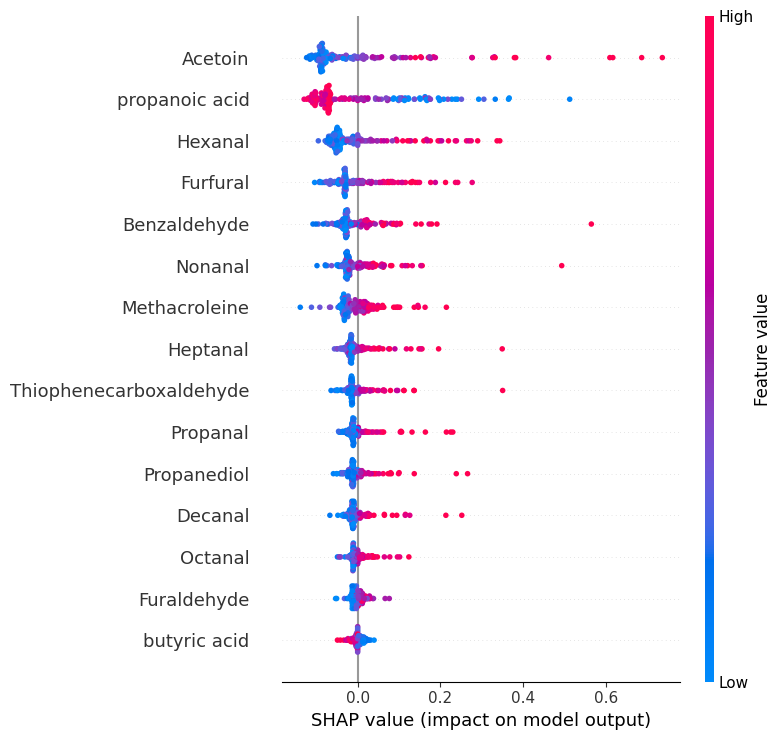

In [182]:
shap.summary_plot(shap_values, CRCX)

# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
#创建KNN分类器对象
KNNclf = KNeighborsClassifier(n_neighbors=5)

In [53]:
print('roc_auc={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

roc_auc=0.797037037037037


In [54]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

准确率=0.7272727272727273


In [55]:
print('precision{}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

precision0.7585620915032679


In [56]:
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(KNNclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

recall=0.7333333333333333


In [57]:
# 使用训练集进行模型训练
KNNclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = KNNclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

AUC: 0.76
Accuracy: 0.76
Precision: 0.82
Recall: 0.77


In [58]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# 获取模型在测试集上的预测概率
y_pred_prob = KNNclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = KNNclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)


AUC: 0.7716666666666667
Accuracy: 0.76
Specificity: 0.75
Sensitivity: 0.7666666666666667


In [59]:
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
NBclf.fit(CRCtrainX, CRCtrainY)
# 获取模型在测试集上的预测概率
y_pred_prob = KNNclf.predict_proba(CRCtestX)[:, 1]  # 使用predict_proba获取概率

# 计算AUC
roc_auc = roc_auc_score(CRCtestY, y_pred_prob)

# 获取模型在测试集上的预测标签
y_pred = KNNclf.predict(CRCtestX)

# 计算Accuracy
accuracy = accuracy_score(CRCtestY, y_pred)

# 计算Confusion Matrix（混淆矩阵）
conf_matrix = confusion_matrix(CRCtestY, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# 计算Specificity和Sensitivity
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)

# 打印结果
print("AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Sensitivity:", sensitivity)

AUC: 0.7716666666666667
Accuracy: 0.76
Specificity: 0.75
Sensitivity: 0.7666666666666667


In [60]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = KNNclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

95% Confidence Interval for AUC: [0.63711002 0.89166667]


In [184]:
explainer = shap.KernelExplainer(KNNclf.predict,CRCX)

Using 157 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [185]:
shap_values = explainer(CRCX)

  0%|          | 0/157 [00:00<?, ?it/s]

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


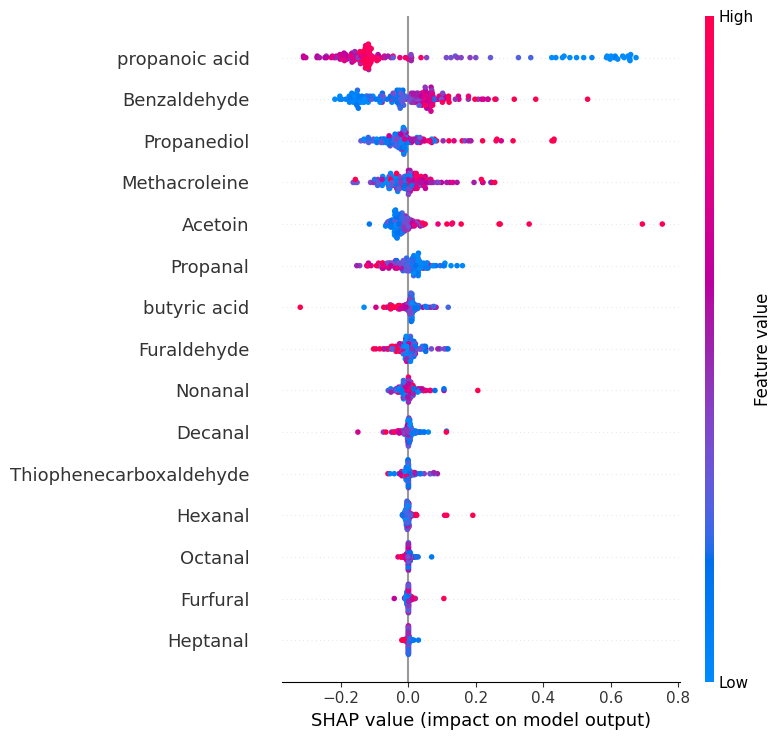

In [186]:
shap.summary_plot(shap_values, CRCX)

# LGB

In [180]:
from lightgbm import LGBMClassifier
# 重要参数：
lgb_model = LGBMClassifier()


G:\anaconda\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
G:\anaconda\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
G:\anaconda\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [186]:
print('roc_auc={}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40, number of negative: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 76, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526316 -> initscore=0.105361
[LightGBM] [Info] Start training from score 0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [188]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40, number of negative: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 76, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526316 -> initscore=0.105361
[LightGBM] [Info] Start training from score 0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [189]:
print('precision{}'.format(cross_val_score(lgb_model,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 40, number of negative: 36
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000075 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 342
[LightGBM] [Info] Number of data points in the train set: 76, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.526316 -> initscore=0.105361
[LightGBM] [Info] Start training from score 0.105361
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [181]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



# 使用训练集进行模型训练
lgb_model.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = lgb_model.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 58, number of negative: 51
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 482
[LightGBM] [Info] Number of data points in the train set: 109, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.532110 -> initscore=0.128617
[LightGBM] [Info] Start training from score 0.128617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

C:\Users\纪\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\纪\AppData\Roaming\Python\Python39\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
  File "G:\anaconda\anaconda3\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "G:\anaconda\anaconda3\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "G:\anaconda\anaconda3\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [195]:
explainer = shap.Explainer(lgb_model)
shap_values = explainer(CRCX)


TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: LGBMClassifier()

# adaboost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [62]:
Adaclf = AdaBoostClassifier(n_estimators=450, random_state=100)


In [63]:
print('roc_auc={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

roc_auc=0.8059259259259258


In [64]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

准确率=0.7393939393939395


In [65]:
print('precision{}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

precision0.7527527258042805


In [66]:
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(Adaclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

recall=0.788888888888889


In [67]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



# 使用训练集进行模型训练
Adaclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = Adaclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

AUC: 0.72
Accuracy: 0.74
Precision: 0.76
Recall: 0.83


In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

Adaclf.fit(CRCtrainX, CRCtrainY)

# 使用模型对测试集进行预测
predictions = Adaclf.predict(CRCtestX)

# 计算AUC
auc = roc_auc_score(CRCtestY, predictions)

# 计算准确率
accuracy = accuracy_score(CRCtestY, predictions)

# 计算混淆矩阵，以便计算特异性和敏感性
conf_matrix = confusion_matrix(CRCtestY, predictions)

# 计算特异性
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# 计算敏感性
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])

# 打印结果
print(f"AUC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Specificity: {specificity}")
print(f"Sensitivity: {sensitivity}")


AUC: 0.7166666666666668
Accuracy: 0.74
Specificity: 0.6
Sensitivity: 0.8333333333333334


In [70]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = Adaclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

95% Confidence Interval for AUC: [0.58506944 0.83333333]


# CatBoost

!pip install catboost


In [71]:
import catboost

In [72]:

from catboost import CatBoostClassifier, Pool


In [73]:
Catclf = CatBoostClassifier(iterations=500, learning_rate=0.05, depth=5, verbose=100)



In [74]:
print('roc_auc={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='roc_auc',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

0:	learn: 0.6748638	total: 192ms	remaining: 1m 35s
100:	learn: 0.0904837	total: 400ms	remaining: 1.58s
200:	learn: 0.0224244	total: 601ms	remaining: 894ms
300:	learn: 0.0112632	total: 816ms	remaining: 539ms
400:	learn: 0.0076575	total: 1.02s	remaining: 253ms
499:	learn: 0.0058156	total: 1.24s	remaining: 0us
0:	learn: 0.6593358	total: 1.71ms	remaining: 854ms
100:	learn: 0.0783650	total: 184ms	remaining: 727ms
200:	learn: 0.0207072	total: 370ms	remaining: 551ms
300:	learn: 0.0111789	total: 558ms	remaining: 369ms
400:	learn: 0.0074216	total: 746ms	remaining: 184ms
499:	learn: 0.0056301	total: 1.05s	remaining: 0us
0:	learn: 0.6671055	total: 2.03ms	remaining: 1.01s
100:	learn: 0.0692915	total: 205ms	remaining: 811ms
200:	learn: 0.0182986	total: 399ms	remaining: 593ms
300:	learn: 0.0101584	total: 611ms	remaining: 404ms
400:	learn: 0.0068046	total: 835ms	remaining: 206ms
499:	learn: 0.0052807	total: 1s	remaining: 0us
0:	learn: 0.6601850	total: 2.51ms	remaining: 1.25s
100:	learn: 0.0653549	tot

In [75]:
#正确预测个数的计数：准确率

print('准确率={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='accuracy',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

0:	learn: 0.6748638	total: 3.85ms	remaining: 1.92s
100:	learn: 0.0904837	total: 265ms	remaining: 1.05s
200:	learn: 0.0224244	total: 497ms	remaining: 740ms
300:	learn: 0.0112632	total: 737ms	remaining: 487ms
400:	learn: 0.0076575	total: 992ms	remaining: 245ms
499:	learn: 0.0058156	total: 1.28s	remaining: 0us
0:	learn: 0.6593358	total: 2.42ms	remaining: 1.21s
100:	learn: 0.0783650	total: 275ms	remaining: 1.09s
200:	learn: 0.0207072	total: 578ms	remaining: 860ms
300:	learn: 0.0111789	total: 808ms	remaining: 534ms
400:	learn: 0.0074216	total: 998ms	remaining: 246ms
499:	learn: 0.0056301	total: 1.22s	remaining: 0us
0:	learn: 0.6671055	total: 2.44ms	remaining: 1.22s
100:	learn: 0.0692915	total: 377ms	remaining: 1.49s
200:	learn: 0.0182986	total: 660ms	remaining: 981ms
300:	learn: 0.0101584	total: 927ms	remaining: 613ms
400:	learn: 0.0068046	total: 1.14s	remaining: 283ms
499:	learn: 0.0052807	total: 1.35s	remaining: 0us
0:	learn: 0.6601850	total: 2.27ms	remaining: 1.13s
100:	learn: 0.0653549	

In [76]:
print('precision{}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='precision',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

0:	learn: 0.6748638	total: 2.54ms	remaining: 1.26s
100:	learn: 0.0904837	total: 233ms	remaining: 920ms
200:	learn: 0.0224244	total: 481ms	remaining: 716ms
300:	learn: 0.0112632	total: 720ms	remaining: 476ms
400:	learn: 0.0076575	total: 990ms	remaining: 245ms
499:	learn: 0.0058156	total: 1.26s	remaining: 0us
0:	learn: 0.6593358	total: 2.09ms	remaining: 1.04s
100:	learn: 0.0783650	total: 205ms	remaining: 812ms
200:	learn: 0.0207072	total: 430ms	remaining: 639ms
300:	learn: 0.0111789	total: 624ms	remaining: 412ms
400:	learn: 0.0074216	total: 807ms	remaining: 199ms
499:	learn: 0.0056301	total: 980ms	remaining: 0us
0:	learn: 0.6671055	total: 1.76ms	remaining: 881ms
100:	learn: 0.0692915	total: 175ms	remaining: 693ms
200:	learn: 0.0182986	total: 346ms	remaining: 515ms
300:	learn: 0.0101584	total: 504ms	remaining: 333ms
400:	learn: 0.0068046	total: 676ms	remaining: 167ms
499:	learn: 0.0052807	total: 860ms	remaining: 0us
0:	learn: 0.6601850	total: 1.74ms	remaining: 870ms
100:	learn: 0.0653549	

In [77]:
#正确预测个数的计数：准确率

print('recall={}'.format(cross_val_score(Catclf,CRCtrainX,CRCtrainY,scoring='recall',cv=cvSFS).mean()))#通过修改scoring的参数可以修改评分器

0:	learn: 0.6748638	total: 2.05ms	remaining: 1.02s
100:	learn: 0.0904837	total: 242ms	remaining: 954ms
200:	learn: 0.0224244	total: 465ms	remaining: 691ms
300:	learn: 0.0112632	total: 717ms	remaining: 474ms
400:	learn: 0.0076575	total: 956ms	remaining: 236ms
499:	learn: 0.0058156	total: 1.2s	remaining: 0us
0:	learn: 0.6593358	total: 2.17ms	remaining: 1.08s
100:	learn: 0.0783650	total: 253ms	remaining: 999ms
200:	learn: 0.0207072	total: 511ms	remaining: 760ms
300:	learn: 0.0111789	total: 762ms	remaining: 504ms
400:	learn: 0.0074216	total: 1.12s	remaining: 276ms
499:	learn: 0.0056301	total: 1.4s	remaining: 0us
0:	learn: 0.6671055	total: 4.61ms	remaining: 2.3s
100:	learn: 0.0692915	total: 385ms	remaining: 1.52s
200:	learn: 0.0182986	total: 642ms	remaining: 955ms
300:	learn: 0.0101584	total: 910ms	remaining: 602ms
400:	learn: 0.0068046	total: 1.18s	remaining: 291ms
499:	learn: 0.0052807	total: 1.46s	remaining: 0us
0:	learn: 0.6601850	total: 2.73ms	remaining: 1.36s
100:	learn: 0.0653549	tot

In [78]:
# 使用训练集进行模型训练
Catclf.fit(CRCtrainX, CRCtrainY)

# 使用模型进行测试集预测
y_pred = Catclf.predict(CRCtestX)

# 计算评价指标
accuracy = accuracy_score(CRCtestY, y_pred)
recall = recall_score(CRCtestY, y_pred)
precision = precision_score(CRCtestY, y_pred)

auc = roc_auc_score(CRCtestY, y_pred)

print(f"AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

0:	learn: 0.6632205	total: 6.34ms	remaining: 3.16s
100:	learn: 0.1001441	total: 329ms	remaining: 1.3s
200:	learn: 0.0270503	total: 619ms	remaining: 921ms
300:	learn: 0.0131873	total: 907ms	remaining: 600ms
400:	learn: 0.0084097	total: 1.13s	remaining: 278ms
499:	learn: 0.0060136	total: 1.33s	remaining: 0us
AUC: 0.68
Accuracy: 0.70
Precision: 0.74
Recall: 0.77


In [79]:
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample

# 设置bootstrap的迭代次数
n_iterations = 1000

# 存储每次迭代的AUC值
auc_scores = []

# 循环进行bootstrap迭代
for _ in range(n_iterations):
    # 通过有放回抽样创建新的测试集
    CRCtestX_bootstrap, CRCtestY_bootstrap = resample(CRCtestX, CRCtestY, random_state=np.random.randint(100))

    # 使用模型进行bootstrap样本的预测
    y_pred_bootstrap = Catclf.predict(CRCtestX_bootstrap)

    # 计算AUC并将其存储
    auc_bootstrap = roc_auc_score(CRCtestY_bootstrap, y_pred_bootstrap)
    auc_scores.append(auc_bootstrap)

# 计算95%置信区间
confidence_interval = np.percentile(auc_scores, [2.5, 97.5])

print(f"95% Confidence Interval for AUC: {confidence_interval}")

95% Confidence Interval for AUC: [0.52579365 0.78298611]
